In [1]:
from google.colab import files
uploaded = files.upload()

Saving main5_dynamiccross_fedgra.csv to main5_dynamiccross_fedgra.csv
Saving main3_fixedcross_fedgra.csv to main3_fixedcross_fedgra.csv
Saving main2_fixedcross_loss.csv to main2_fixedcross_loss.csv
Saving main_fedgra.csv to main_fedgra.csv
Saving main_loss.csv to main_loss.csv
Saving main_random.csv to main_random.csv
Saving main_allclients.csv to main_allclients.csv


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# csv path
# loss_csv_100 = "loss1.csv"
# fedgra_csv_100 = "fedgra1.csv"
# #random_csv_100 = "training_data_20250416_162836_random2.csv"
# weighting_fedgra_csv_100 = "cwlfedgra1.csv"
# weighting_loss_csv_100 = "cwloss1.csv"
# weighting_fedgra_update_csv_100 = "training_data_20250601_062504_main5_pro2.csv"
# weighting_fedgra_update_csv_100_1 = "cwfedgra4.csv"

In [111]:
# load data
# df_loss_100 = pd.read_csv(loss_csv_100)
# df_fedgra_csv_100 = pd.read_csv(fedgra_csv_100)
# #df_random_csv_100 = pd.read_csv(random_csv_100)
# df_weighting_fedgra_csv_100 = pd.read_csv(weighting_fedgra_csv_100)
# df_weighting_loss_csv_100 = pd.read_csv(weighting_loss_csv_100)
# df_weighting_fedgra_update_csv_100 = pd.read_csv(weighting_fedgra_update_csv_100)
# df_weighting_fedgra_update_csv_100_1 = pd.read_csv(weighting_fedgra_update_csv_100_1)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


csv_files = {
    "All Clients": "main_allclients.csv",
    "Random": "main_random.csv",
    "High Loss": "main_loss.csv",
    "FedGRA": "main_fedgra.csv",
    "W-Loss": "main2_fixedcross_loss.csv",
    "W-FedGRA": "main3_fixedcross_fedgra.csv",
    "W-FedGRA-dynamic": "main5_dynamiccross_fedgra.csv"
}

dfs = {}
for label, path in csv_files.items():
    df = pd.read_csv(path)
    df["Cumulative Time"] = df["Time"].cumsum()
    df["Cumulative Parameters"] = df["Total Active Parameters"].cumsum()
    df["Cumulative FLOPs"] = df["Total FLOPs"].cumsum()
    df["Smoothed Accuracy"] = df["Accuracy"].rolling(window=30, min_periods=1).mean()
    dfs[label] = df


def plot_metric(metric, labels, title, ylabel):
    plt.figure(figsize=(10, 6))
    for label in labels:
        plt.plot(dfs[label]["Round"], dfs[label][metric], label=label)
        plt.fill_between(dfs[label]["Round"], dfs[label][metric], alpha=0.15)
    plt.xlabel("Round")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_4_way_compare(metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    labels = ["High Loss", "W-Loss", "FedGRA", "W-FedGRA"]
    for label in labels:
        plt.plot(dfs[label]["Round"], dfs[label][metric], label=label)
        plt.fill_between(dfs[label]["Round"], dfs[label][metric], alpha=0.15)
    plt.xlabel("Round")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




In [15]:
# Figure 1: main1 - Comparison of accuracy of multiple strategies
plot_metric("Smoothed Accuracy", ["All Clients", "Random", "High Loss", "FedGRA"],
            "Client Selection Strategy Comparison (Smoothed Accuracy)", "Accuracy")

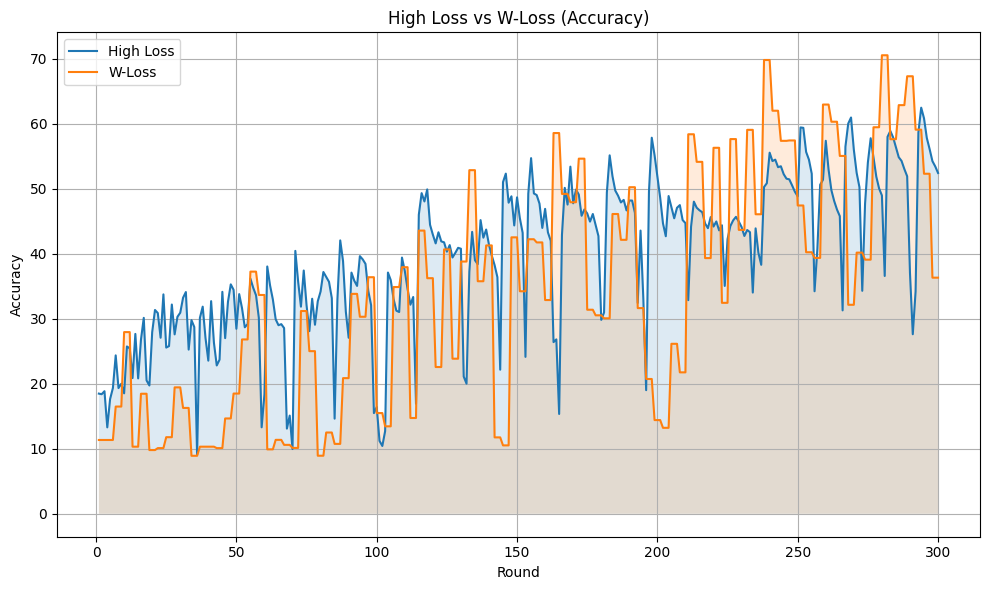

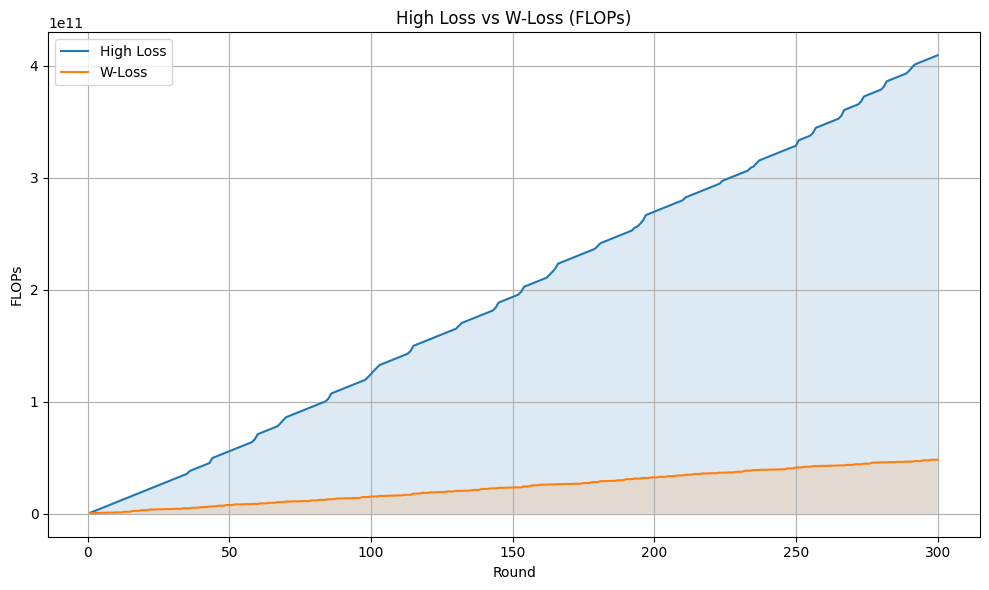

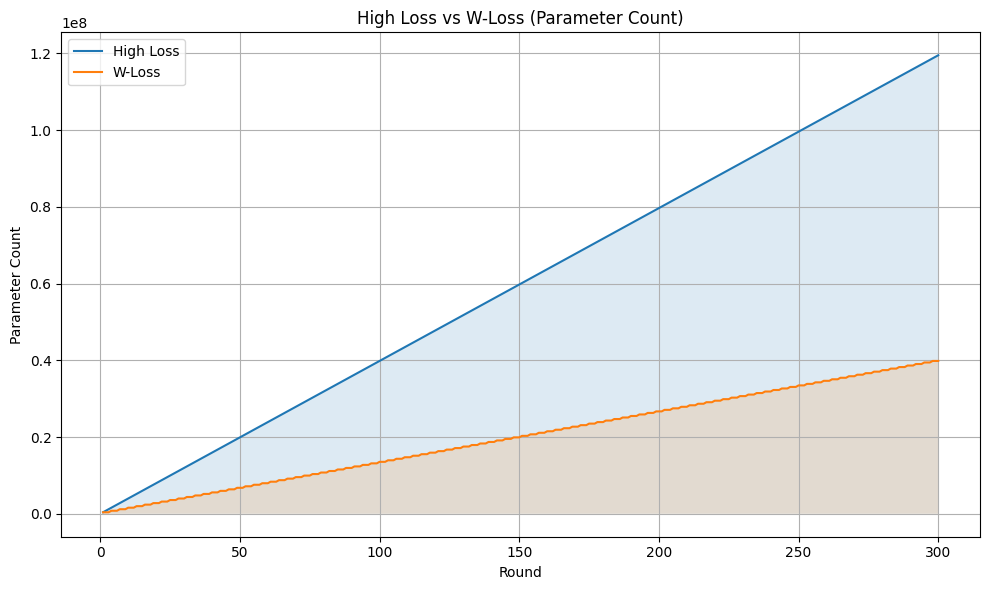

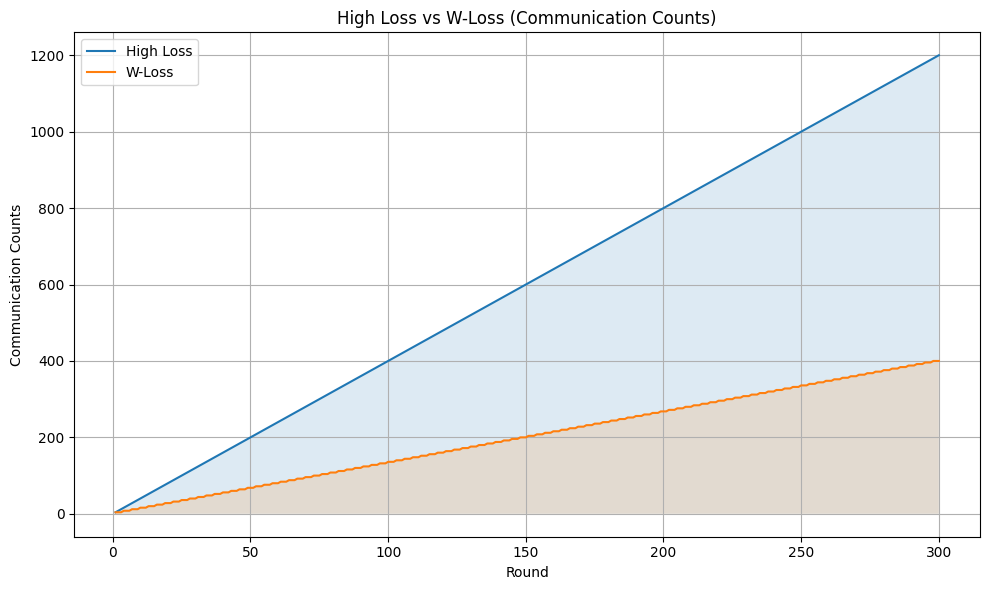

In [16]:
# fig2：main1-HighLoss vs main2
for m, y in zip(["Accuracy", "Cumulative FLOPs", "Cumulative Parameters", "Cumulative Time", "Total communication counts"],
                ["Accuracy", "FLOPs", "Parameter Count", "Time (s)", "Communication Counts"]):
    plot_metric(m, ["High Loss", "W-Loss"], f"High Loss vs W-Loss ({y})", y)

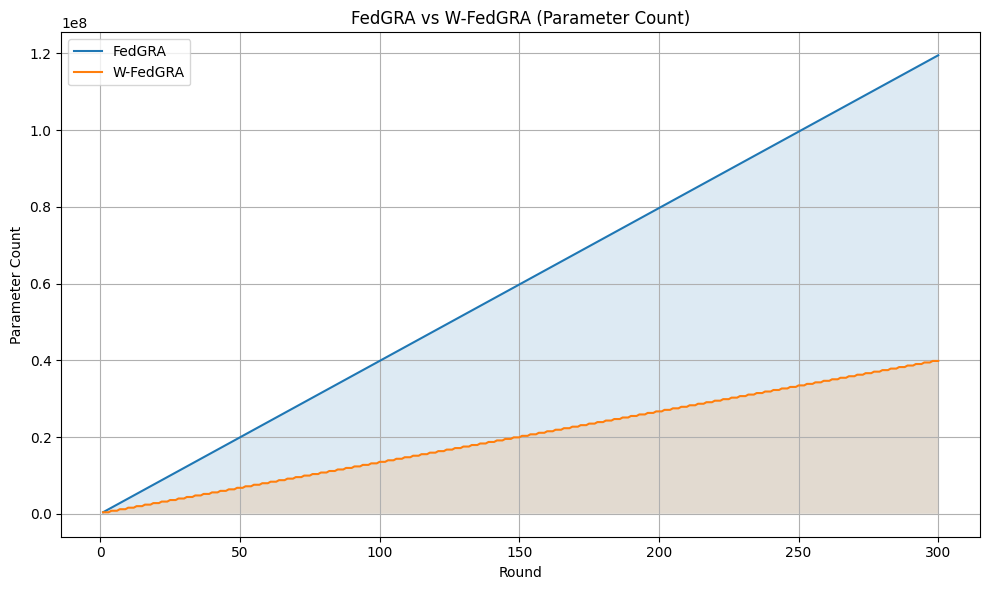

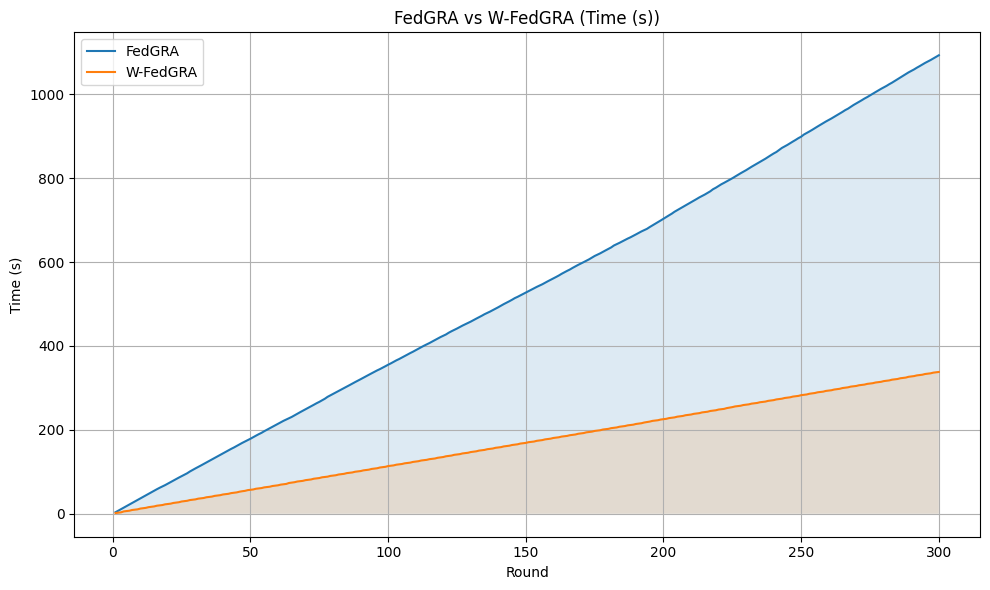

In [17]:
# fig3：main1-FedGRA vs main3
for m, y in zip(["Accuracy", "Cumulative FLOPs", "Cumulative Parameters", "Cumulative Time", "Total communication counts"],
                ["Accuracy", "FLOPs", "Parameter Count", "Time (s)", "Communication Counts"]):
    plot_metric(m, ["FedGRA", "W-FedGRA"], f"FedGRA vs W-FedGRA ({y})", y)

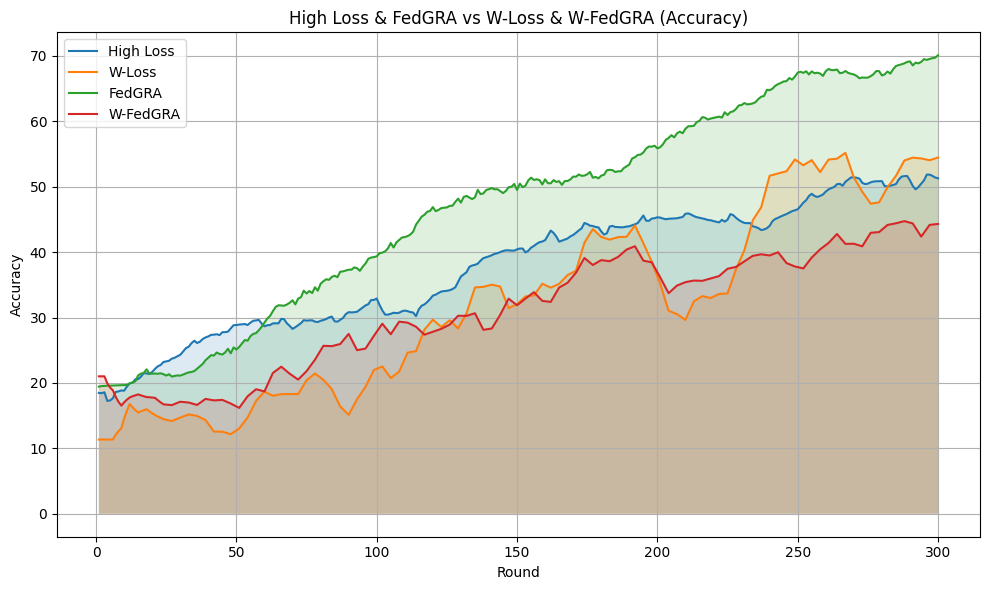

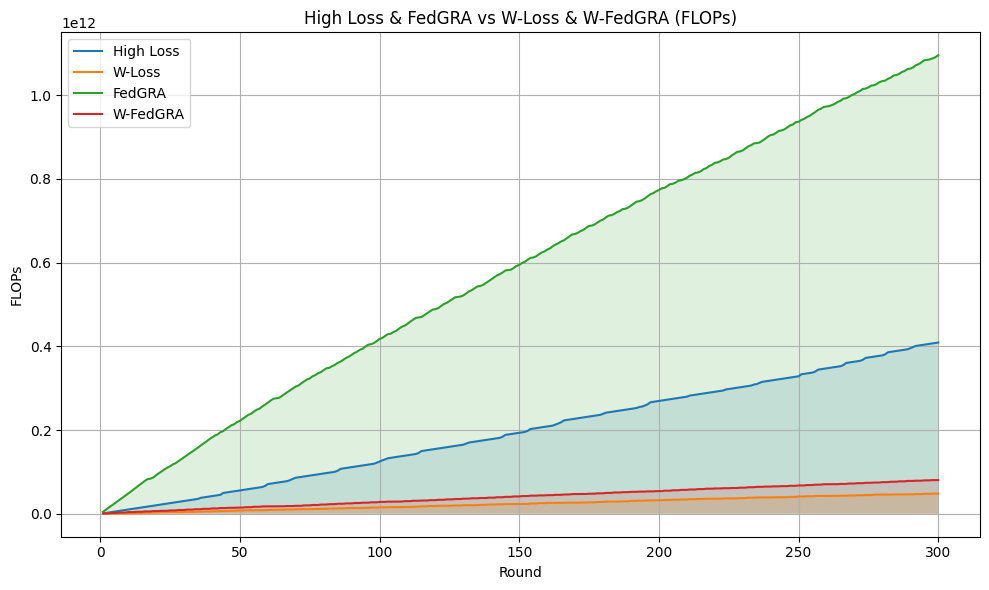

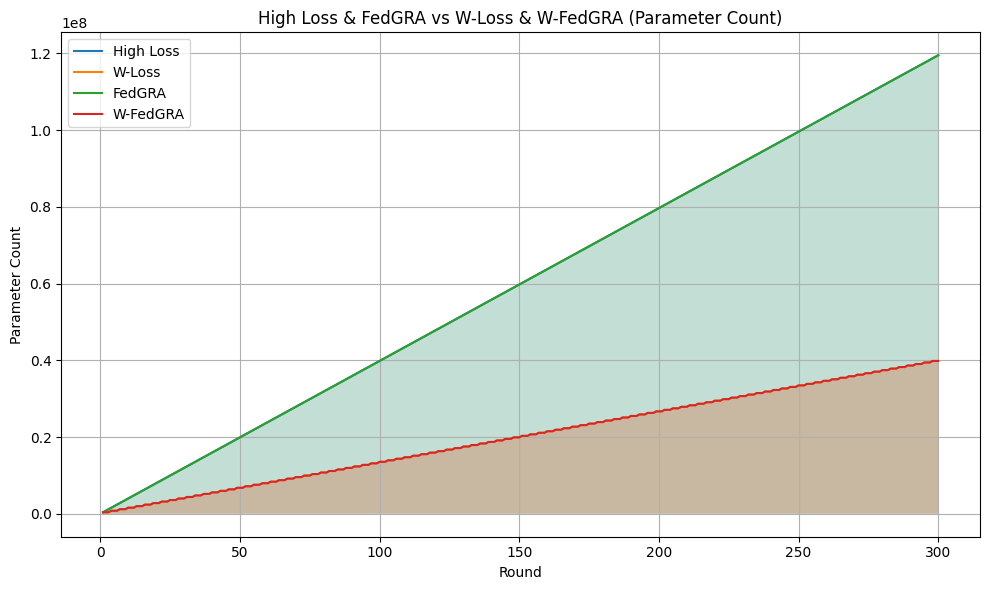

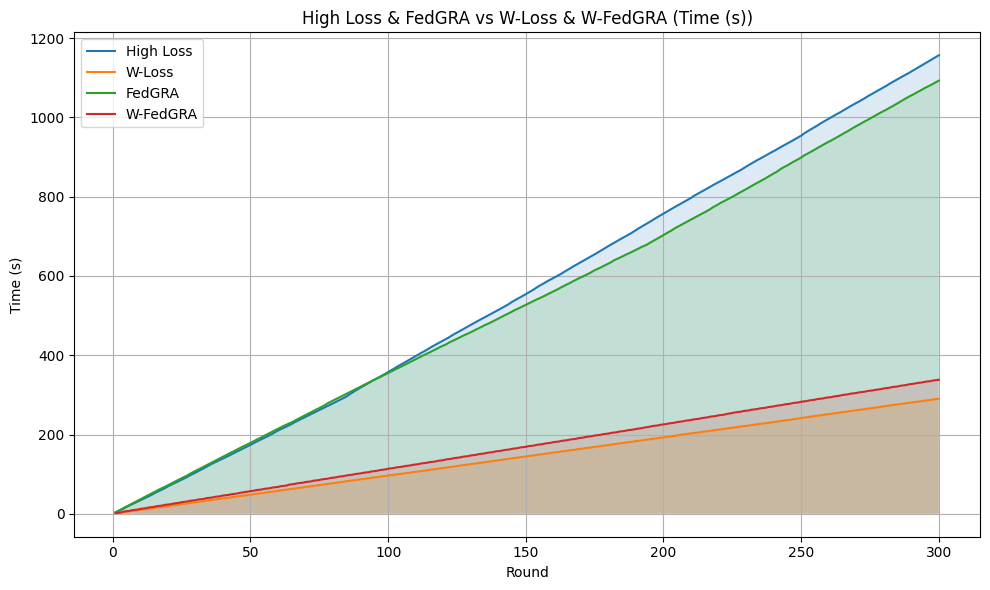

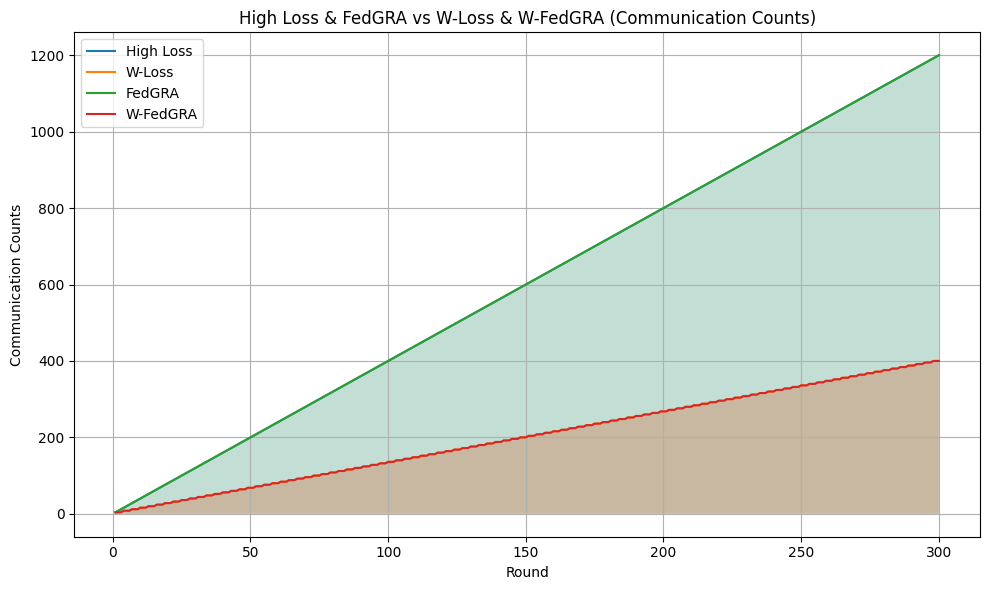

In [19]:
# fig4：main1-FedGRA vs main1-High loss vs main2 vs main3
metrics = ["Smoothed Accuracy", "Cumulative FLOPs", "Cumulative Parameters", "Cumulative Time", "Total communication counts"]
labels  = ["Accuracy", "FLOPs", "Parameter Count", "Time (s)", "Communication Counts"]

for m, y in zip(metrics, labels):
    plot_4_way_compare(m, f"High Loss & FedGRA vs W-Loss & W-FedGRA ({y})", y)



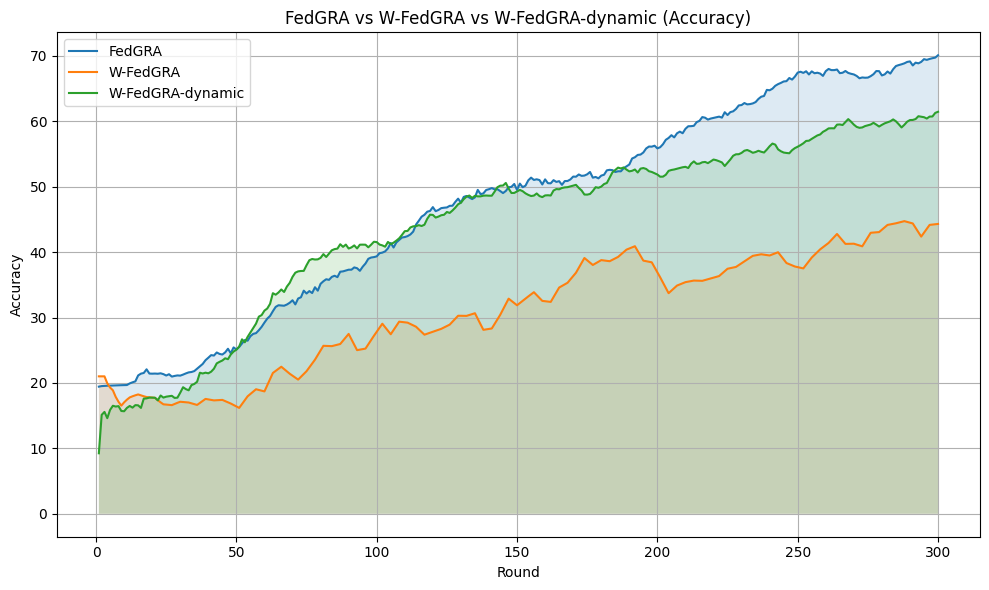

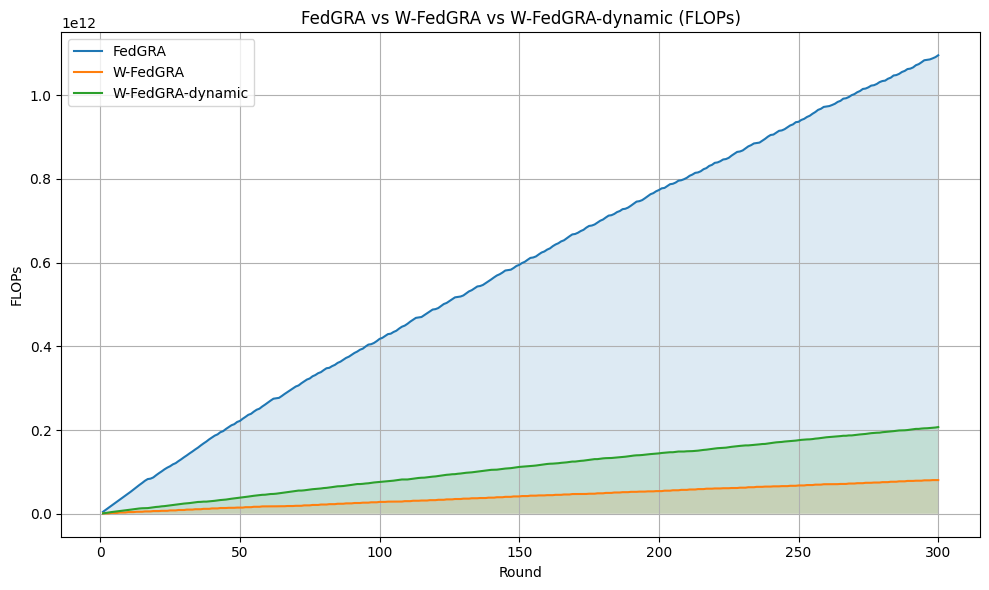

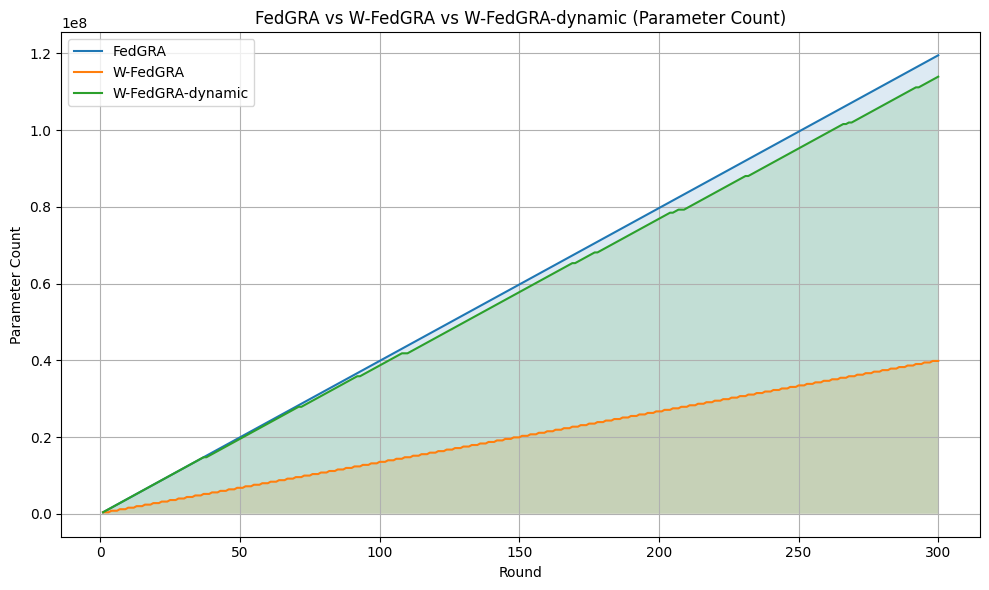

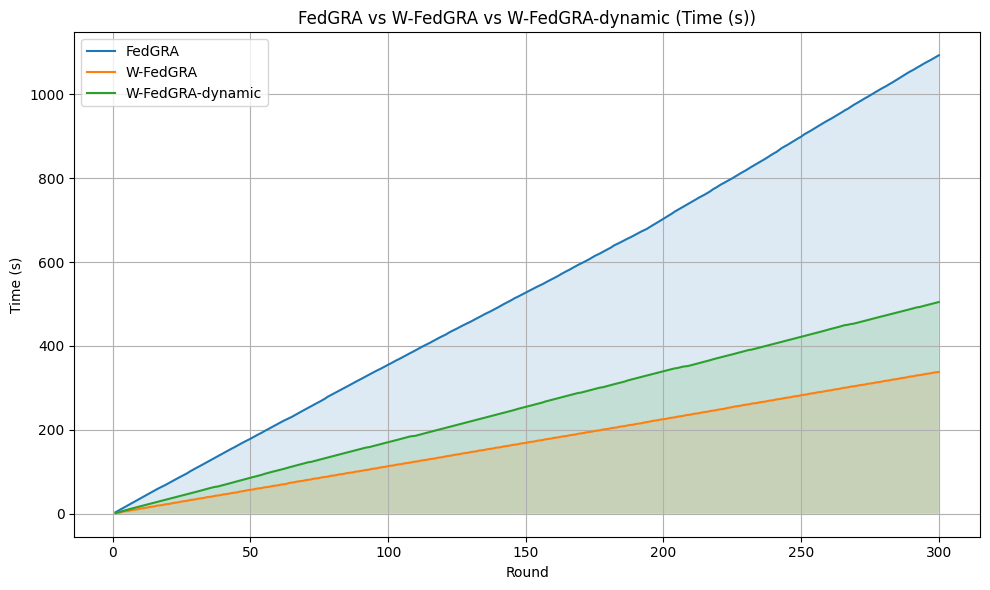

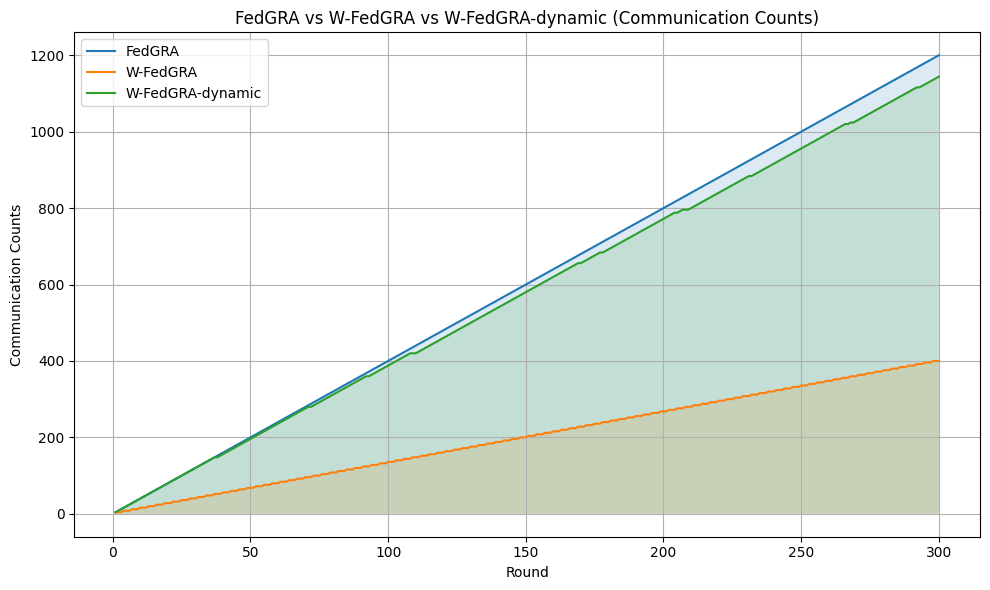

In [20]:
# fig5：main1-FedGRA vs main3 vs main5
for m, y in zip(
    ["Smoothed Accuracy", "Cumulative FLOPs", "Cumulative Parameters", "Cumulative Time", "Total communication counts"],
    ["Accuracy", "FLOPs", "Parameter Count", "Time (s)", "Communication Counts"]
):
    plot_metric(m, ["FedGRA", "W-FedGRA", "W-FedGRA-dynamic"], f"FedGRA vs W-FedGRA vs W-FedGRA-dynamic ({y})", y)


In [9]:

def extract_client_ids(column):
    return [list(map(int, str(x).split(','))) for x in column]

client_list_loss = extract_client_ids(dfs["High Loss"]["Selected Clients"])
client_list_fedgra = extract_client_ids(dfs["FedGRA"]["Selected Clients"])


round_list_loss = [r for r, clients in zip(dfs["High Loss"]["Round"], client_list_loss) for _ in clients]
client_list_flat_loss = [c for clients in client_list_loss for c in clients]

round_list_fedgra = [r for r, clients in zip(dfs["FedGRA"]["Round"], client_list_fedgra) for _ in clients]
client_list_flat_fedgra = [c for clients in client_list_fedgra for c in clients]


plt.figure(figsize=(10, 6))
plt.scatter(round_list_loss, client_list_flat_loss, color='blue', marker='o', label='High Loss')
plt.scatter(round_list_fedgra, client_list_flat_fedgra, color='red', marker='x', label='FedGRA')
plt.xlabel('Communication Round')
plt.ylabel('Client ID')
plt.title('Selected Clients per Round (High Loss vs FedGRA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


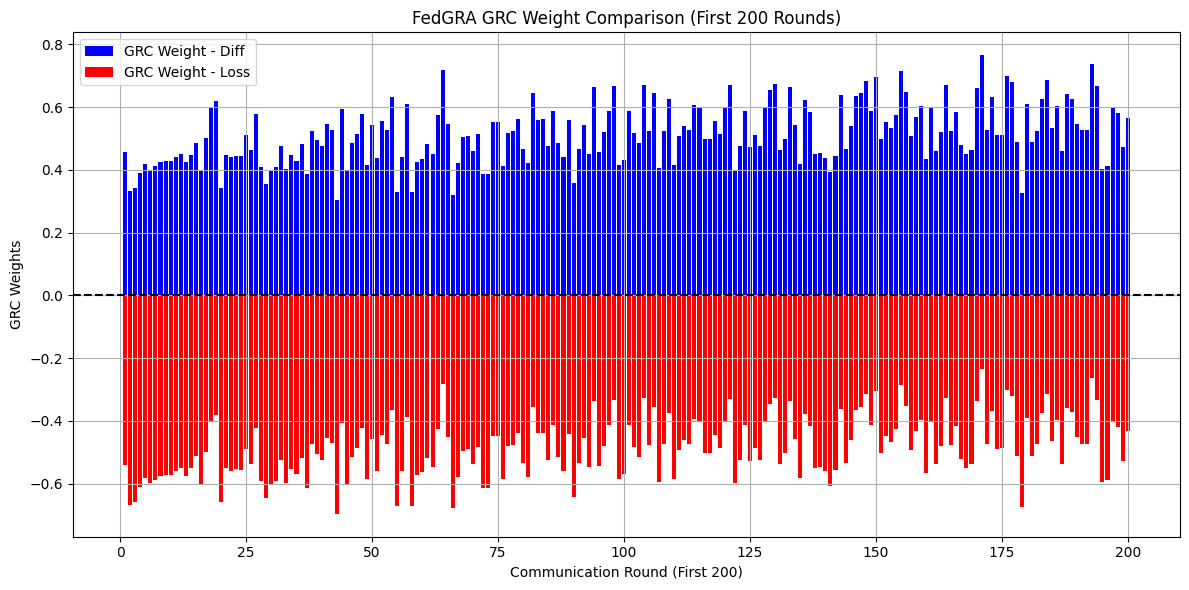

In [11]:
df_fedgra_200 = dfs["FedGRA"].head(200)


w_loss = pd.to_numeric(df_fedgra_200["GRC Weight - Loss"], errors='coerce')
w_diff = pd.to_numeric(df_fedgra_200["GRC Weight - Diff"], errors='coerce')
rounds = df_fedgra_200["Round"]


plt.figure(figsize=(12, 6))
plt.bar(rounds, w_diff, color='blue', label='GRC Weight - Diff')
plt.bar(rounds, -w_loss, color='red', label='GRC Weight - Loss')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Communication Round (First 200)')
plt.ylabel('GRC Weights')
plt.title('FedGRA GRC Weight Comparison (First 200 Rounds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
